In [3]:
# 所用sklearn库
# 映入sklearn，主要是用里边的线性回归模块
from sklearn import datasets,linear_model
# train_test_split是用来把数据集拆分成为训练集和测试集
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [4]:
## 创建数据集，把数据写入到numpy数组中
data = np.array([[151,51],
                [156,53],
                [160,61],
                [164,59],
                [168,62],
                 [172,60],
                 [176,68],
                 [180,70],
                 [184,75],
                 [188,80]
                ])
data

array([[151,  51],
       [156,  53],
       [160,  61],
       [164,  59],
       [168,  62],
       [172,  60],
       [176,  68],
       [180,  70],
       [184,  75],
       [188,  80]])

In [5]:
# X，y是分别存储放特征向量和标签
# 这里边使用了reshape(-1，1),（任意行，1列）其主要原因是data[:,0]是一维的数组(因为只有一个特征),但后边调用模型的时候对特征向量的要求是
# 矩阵的形式，所以这里所了reshape的操作
X,y=data[:,0].reshape(-1,1),data[:,1]

In [6]:
X

array([[151],
       [156],
       [160],
       [164],
       [168],
       [172],
       [176],
       [180],
       [184],
       [188]])

In [7]:
y

array([51, 53, 61, 59, 62, 60, 68, 70, 75, 80])

In [8]:
# 用train_test_split函数把数据随机分成训练数据和测试数据
# 训练数据的占比是由train_size这个参数来决定的。 
# 如果是0.8就意味着随机抽取80%的数据作为训练集

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

D:\Anaconda\envs\py36\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
X_train

array([[168],
       [184],
       [172],
       [176],
       [156],
       [164],
       [160],
       [180]])

In [22]:
X_test

array([[151],
       [188]])

In [23]:
y_train

array([62, 75, 60, 68, 53, 59, 61, 70])

In [12]:
# 实例化一个线性回归的模型
regr = linear_model.LinearRegression()
# 拟合给定的数据
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [20]:
# 在训练集上做验证，并观察是否训练得当，首先输出训练集上的决定系数R平方值
regr.score(X_train,y_train)

0.8631984585741812

In [21]:
regr.predict(X_train)

array([62.16666667, 72.83333333, 64.83333333, 67.5       , 54.16666667,
       59.5       , 56.83333333, 70.16666667])

# 可视化

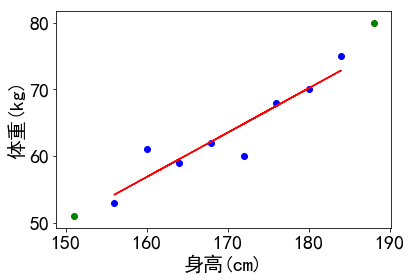

In [17]:
font = {
    "family":"SimHei",
    "size":"20"
}
plt.rc("font",**font)

# 首先画给定的训练数据
plt.scatter(X_train,y_train,color='blue')
# 画线
plt.plot(X_train,regr.predict(X_train),color='red')

# 画出测试数据
plt.scatter(X_test,y_test,color='green')

plt.xlabel("身高(cm)")
plt.ylabel('体重(kg)')
plt.show()

In [18]:
## 输出一下在测试集上的R平方值
regr.score(X_test,y_test)

0.9517769850706831

In [19]:
regr.predict([[163]])

array([58.83333333])